In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the Air Passenger dataset
url = '/content/AirPassengers.csv'  # Update with the correct path
data = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

# Display first few rows of data
print(data.head())


            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


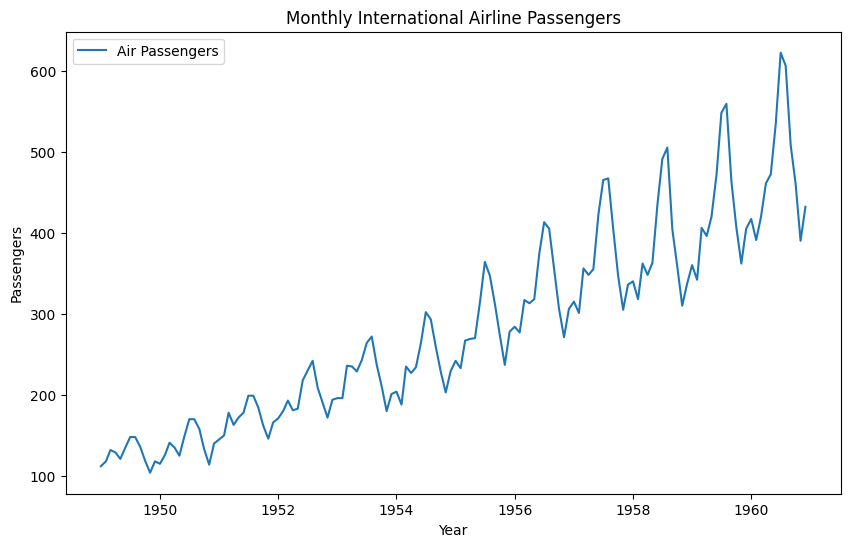

In [ ]:

# Plot the Air Passenger time series (Original Series)
plt.figure(figsize=(10,6))
plt.plot(data, label="Air Passengers")
plt.title("Monthly International Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend(loc='best')
plt.show()


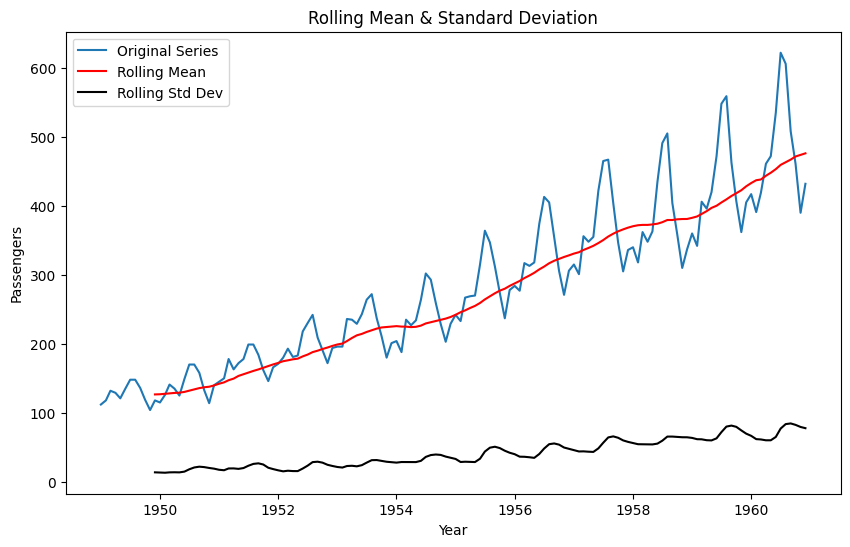

In [ ]:

# Rolling Statistics (Moving Mean and Moving Standard Deviation)
rolling_mean = data.rolling(window=12).mean()  # 12-month moving average
rolling_std = data.rolling(window=12).std()    # 12-month moving standard deviation

# Plot the rolling statistics
plt.figure(figsize=(10,6))
plt.plot(data, label="Original Series")
plt.plot(rolling_mean, label="Rolling Mean", color='red')
plt.plot(rolling_std, label="Rolling Std Dev", color='black')
plt.title("Rolling Mean & Standard Deviation")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend(loc='best')
plt.show()


In [ ]:

# Function to perform Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic: ", result[0])
    print("p-value: ", result[1])
    print("Critical Values: ")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")

    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

# Perform ADF test on the dataset to check for stationarity
adf_test(data)


ADF Statistic:  0.8153688792060498
p-value:  0.991880243437641
Critical Values: 
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598
The series is not stationary.


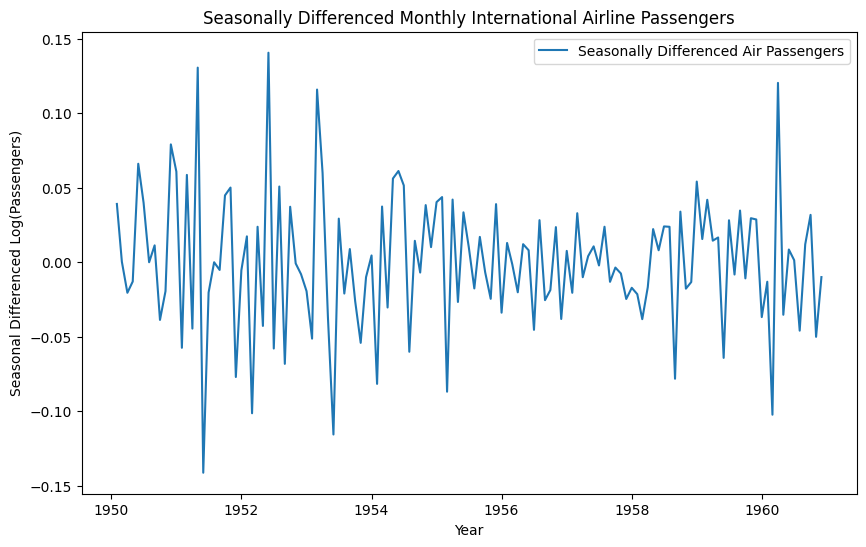

Seasonally Differenced Series ADF Test:
ADF Statistic:  -4.4433249418311425
p-value:  0.00024859123113838495
Critical Values: 
	1%: -3.4870216863700767
	5%: -2.8863625166643136
	10%: -2.580009026141913
The series is stationary.


In [ ]:
# Apply log transformation to stabilize variance
data_log = np.log(data)

# Apply first-order differencing to remove trend
data_log_diff = data_log.diff().dropna()

# Apply seasonal differencing (12-month lag) to handle seasonality
data_seasonal_diff = data_log_diff.diff(12).dropna()

# Plot the seasonally differenced data
plt.figure(figsize=(10,6))
plt.plot(data_seasonal_diff, label="Seasonally Differenced Air Passengers")
plt.title("Seasonally Differenced Monthly International Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Seasonal Differenced Log(Passengers)")
plt.legend(loc='best')
plt.show()

# Perform ADF test on the seasonally differenced data
print("Seasonally Differenced Series ADF Test:")
adf_test(data_seasonal_diff['#Passengers'])

